In [1]:
library(spacexr)
library(Matrix)
library(yaml)

In [2]:
source("data_loader.R")

In [54]:
data=load_MERFISH(100)

st_counts 135 3067 
st_locations 3067 2 
sc_counts 19972 1691 
sc_labels 1691 


In [55]:
data$sc_counts

,X1772071015_C02,X1772071017_G12,X1772071017_A05,X1772071014_B06,X1772067065_H06,X1772071017_E02,X1772067065_B07,X1772071014_E04,X1772071015_D04,X1772071015_C11,...,X1772063074_H03,X1772063062_H10,X1772058148_D02,X1772063078_G10,X1772071017_A07,X1772063071_G10,X1772058148_C03,X1772063061_D09,X1772063068_D01,X1772058148_F03
Tspan12,0,0,0,3,0,0,3,0,0,2,...,0,0,0,0,0,0,0,0,0,1
Tshz1,3,1,0,2,2,2,2,0,2,1,...,0,0,0,0,0,0,0,0,0,1
Fnbp1l,3,1,6,4,1,2,1,5,2,4,...,0,0,0,1,0,0,0,0,0,0
Adamts15,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Cldn12,1,1,1,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,0,0
Rxfp1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0
2310042E22Rik,0,0,2,3,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
Sema3c,11,0,25,1,10,0,7,8,28,9,...,0,2,0,0,0,1,0,0,0,0
Jam2,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Apbb1ip,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
t1=Sys.time()


In [26]:
t=Sys.time()-t1

In [32]:
as.numeric(t,units="secs")

[1] 85.65803

In [25]:
as.double(t2-t1)

[1] 0.6837344

In [4]:
sc_reference=Reference(
    counts=data$sc_counts,
    cell_types=data$sc_labels
)

In [5]:
st_data=SpatialRNA(
    counts=data$st_counts,
    coords=data$st_location,
    require_int=FALSE
)

In [40]:
myRCTD <- create.RCTD(st_data, sc_reference, max_cores = 50, CELL_MIN_INSTANCE = 1)
myRCTD <- run.RCTD(myRCTD, doublet_mode = 'doublet')


Begin: process_cell_type_info
process_cell_type_info: number of cells in reference: 1926
process_cell_type_info: number of genes in reference: 19736



                             Acinar cells 
                                       13 
                           Cancer clone A 
                                      126 
                           Cancer clone B 
                                      170 
           Ductal - APOL1 high or hypoxic 
                                      215 
Ductal - CRISP3 high or centroacinar like 
                                      529 
                    Ductal - MHC Class II 
                                      287 
            Ductal - terminal ductal like 
                                      350 
                          Endocrine cells 
                                        3 
                        Endothelial cells 
                                       11 
                              Fibroblasts 
                                        5 
                            Macrophages A 
                                       21 
                            Macrophages B 
          

End: process_cell_type_info
create.RCTD: getting regression differentially expressed genes: 
get_de_genes: Acinar cells found DE genes: 34
get_de_genes: Cancer clone A found DE genes: 326
get_de_genes: Cancer clone B found DE genes: 343
get_de_genes: Ductal - APOL1 high or hypoxic found DE genes: 326
get_de_genes: Ductal - CRISP3 high or centroacinar like found DE genes: 210
get_de_genes: Ductal - MHC Class II found DE genes: 251
get_de_genes: Ductal - terminal ductal like found DE genes: 256
get_de_genes: Endocrine cells found DE genes: 722
get_de_genes: Endothelial cells found DE genes: 450
get_de_genes: Fibroblasts found DE genes: 696
get_de_genes: Macrophages A found DE genes: 309
get_de_genes: Macrophages B found DE genes: 364
get_de_genes: Mast cells found DE genes: 308
get_de_genes: mDCs A found DE genes: 352
get_de_genes: mDCs B found DE genes: 251
get_de_genes: Monocytes found DE genes: 443
get_de_genes: pDCs found DE genes: 523
get_de_genes: RBCs found DE genes: 17
get_de_gen

In [41]:
weights=myRCTD@results$weights
norm_weights=normalize_weights(weights)

In [43]:
norm_weights

308 x 20 Matrix of class "dgeMatrix"
                 Acinar cells Cancer clone A Cancer clone B
PDAC-A-ST2_10x13 1.080564e-04   3.502267e-01   1.253028e-01
PDAC-A-ST2_10x14 1.116096e-04   5.129525e-01   7.347565e-02
PDAC-A-ST2_10x15 6.392687e-05   3.011195e-01   7.701170e-02
PDAC-A-ST2_10x16 7.022972e-05   5.091232e-01   1.722793e-01
PDAC-A-ST2_10x17 5.426687e-05   5.245206e-01   2.582809e-01
PDAC-A-ST2_10x19 9.065241e-05   4.152100e-01   6.333673e-02
PDAC-A-ST2_10x20 9.996545e-05   2.106398e-01   2.279412e-01
PDAC-A-ST2_10x21 5.692855e-05   3.644781e-01   6.756221e-05
PDAC-A-ST2_10x22 1.185967e-04   4.016986e-01   7.377433e-02
PDAC-A-ST2_10x23 1.136556e-04   2.480488e-01   1.696949e-01
PDAC-A-ST2_10x24 8.565806e-05   1.430030e-01   1.834489e-01
PDAC-A-ST2_10x25 1.096216e-04   4.457887e-01   3.460898e-02
PDAC-A-ST2_10x26 3.312032e-05   4.748807e-02   8.261854e-03
PDAC-A-ST2_11x10 4.711816e-05   3.746358e-01   7.104551e-02
PDAC-A-ST2_11x11 2.721881e-03   3.578112e-01   2.394684e-02
PDA

In [46]:
as.matrix(norm_weights)

,Acinar cells,Cancer clone A,Cancer clone B,Ductal - APOL1 high or hypoxic,Ductal - CRISP3 high or centroacinar like,Ductal - MHC Class II,Ductal - terminal ductal like,Endocrine cells,Endothelial cells,Fibroblasts,Macrophages A,Macrophages B,Mast cells,mDCs A,mDCs B,Monocytes,pDCs,RBCs,T cells & NK cells,Tuft cells
PDAC-A-ST2_10x13,1.080564e-04,0.35022673,1.253028e-01,1.080564e-04,1.080564e-04,1.080564e-04,1.080564e-04,7.443948e-02,7.666057e-03,0.18980624,1.080564e-04,9.254500e-02,1.080564e-04,1.080564e-04,1.176027e-01,1.080564e-04,4.111428e-02,1.080564e-04,1.080564e-04,1.080564e-04
PDAC-A-ST2_10x14,1.116096e-04,0.51295245,7.347565e-02,7.397581e-05,6.627681e-05,6.627681e-05,6.627681e-05,1.577038e-02,1.125002e-01,0.11666110,2.532573e-02,1.848407e-02,6.627681e-05,9.985858e-03,6.627681e-05,6.627681e-05,3.350767e-02,2.588588e-02,3.136607e-02,2.350169e-02
PDAC-A-ST2_10x15,6.392687e-05,0.30111948,7.701170e-02,6.392687e-05,6.392687e-05,6.392687e-05,6.392687e-05,2.745032e-02,1.872776e-01,0.12136532,2.371533e-02,6.392687e-05,2.543278e-03,5.710358e-02,6.392687e-05,1.633909e-02,6.858979e-03,1.411398e-01,3.589972e-02,1.728351e-03
PDAC-A-ST2_10x16,7.022972e-05,0.50912316,1.722793e-01,5.951920e-02,7.022972e-05,7.022972e-05,7.022972e-05,1.408385e-02,3.368640e-02,0.07761949,4.025684e-02,7.022972e-05,2.857668e-03,7.022972e-05,1.867282e-02,7.784038e-03,7.022972e-05,6.348352e-02,7.186779e-05,7.022972e-05
PDAC-A-ST2_10x17,5.426687e-05,0.52452062,2.582809e-01,1.027188e-01,5.426687e-05,5.426687e-05,7.851477e-05,1.571906e-02,1.161854e-04,0.06215690,3.575791e-02,5.426687e-05,5.426687e-05,5.426687e-05,5.426687e-05,5.426687e-05,5.426687e-05,5.426687e-05,5.426687e-05,5.426687e-05
PDAC-A-ST2_10x19,9.065241e-05,0.41520996,6.333673e-02,9.065240e-05,9.065240e-05,9.065240e-05,9.065240e-05,9.065240e-05,3.960298e-02,0.03365191,4.194347e-03,9.065240e-05,9.065241e-05,5.065827e-03,9.065240e-05,4.239730e-02,9.065240e-05,2.360580e-01,1.203230e-01,3.925339e-02
PDAC-A-ST2_10x20,9.996545e-05,0.21063985,2.279412e-01,9.996546e-05,9.996546e-05,9.996546e-05,3.139479e-02,9.996546e-05,3.616287e-02,0.07431230,9.996546e-05,9.996546e-05,9.996545e-05,1.733173e-01,9.996546e-05,9.996546e-05,1.835158e-01,6.151624e-02,9.996546e-05,9.996546e-05
PDAC-A-ST2_10x21,5.692855e-05,0.36447808,6.756221e-05,5.692855e-05,5.692855e-05,5.692855e-05,5.692855e-05,6.021566e-05,1.129660e-01,0.07353751,7.146695e-02,1.760683e-02,5.692855e-05,3.861374e-02,5.692855e-05,5.692855e-05,1.235456e-02,2.860413e-01,2.229494e-02,5.692855e-05
PDAC-A-ST2_10x22,1.185967e-04,0.40169864,7.377433e-02,1.185967e-04,1.185967e-04,1.185967e-04,1.185967e-04,1.185967e-04,4.932806e-02,0.12517936,1.229962e-01,1.185967e-04,1.185967e-04,1.185967e-04,1.185967e-04,4.576235e-02,5.824583e-02,1.185967e-04,1.215921e-01,1.185967e-04
PDAC-A-ST2_10x23,1.136556e-04,0.24804878,1.696949e-01,1.136556e-04,1.136556e-04,1.136556e-04,1.136556e-04,9.778760e-02,8.398516e-02,0.15214382,4.203249e-02,1.568419e-02,1.136556e-04,1.300403e-01,1.136556e-04,1.913921e-02,1.136556e-04,1.136556e-04,4.030703e-02,1.136556e-04


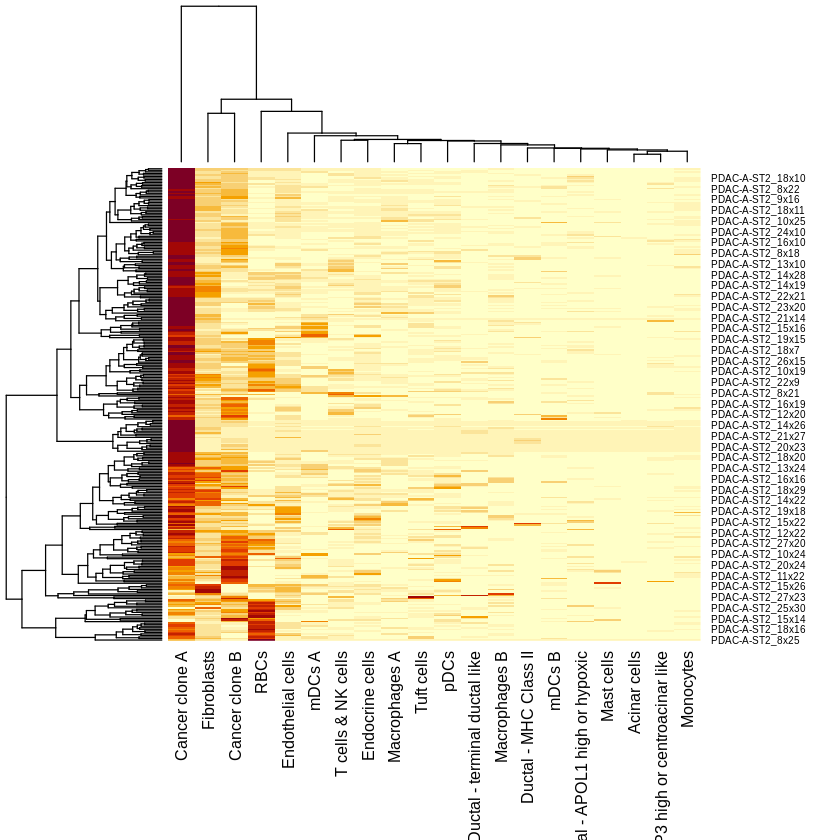

In [52]:
heatmap(as.matrix(norm_weights), margins = c(10,7))

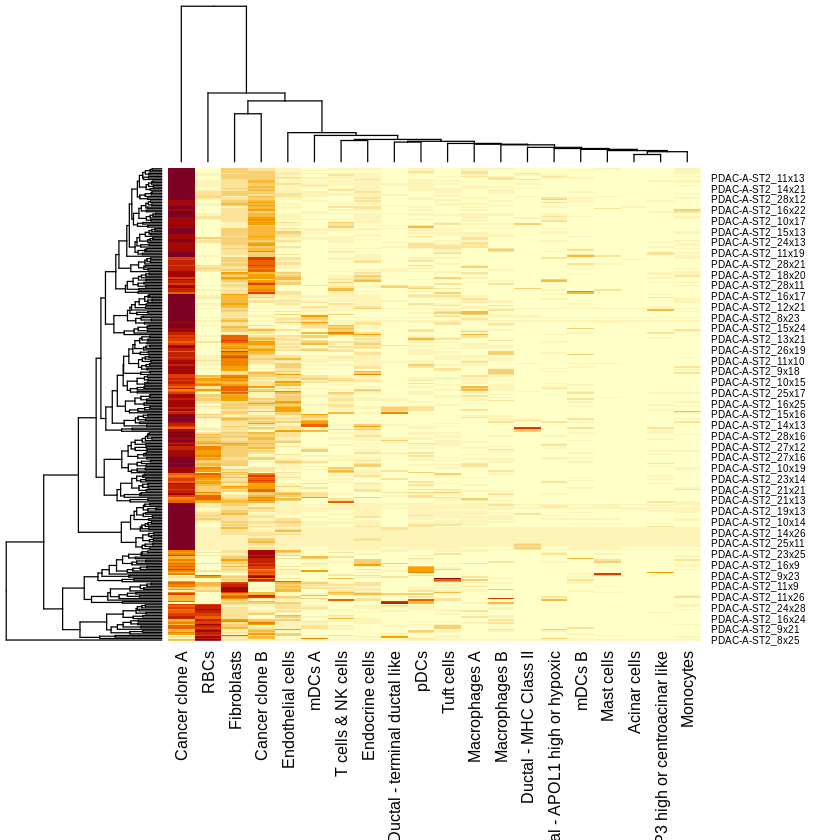

In [50]:
heatmap(as.matrix(myRCTD@results$weights), margins = c(10,7))